# Choosing a Model Review

Dataset Preview:
       Profit  Month       Sales
0  288.202617      1  688.315070
1  220.007860      2  365.224094
2  248.936899      3  372.951500
3  312.044660      4  596.939671
4  293.377900      5  382.687659

Simple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7305
Date:                Fri, 25 Oct 2024   Prob (F-statistic):              0.395
Time:                        01:30:33   Log-Likelihood:                -533.51
No. Observations:                 100   AIC:                             1071.
Df Residuals:                      98   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust  

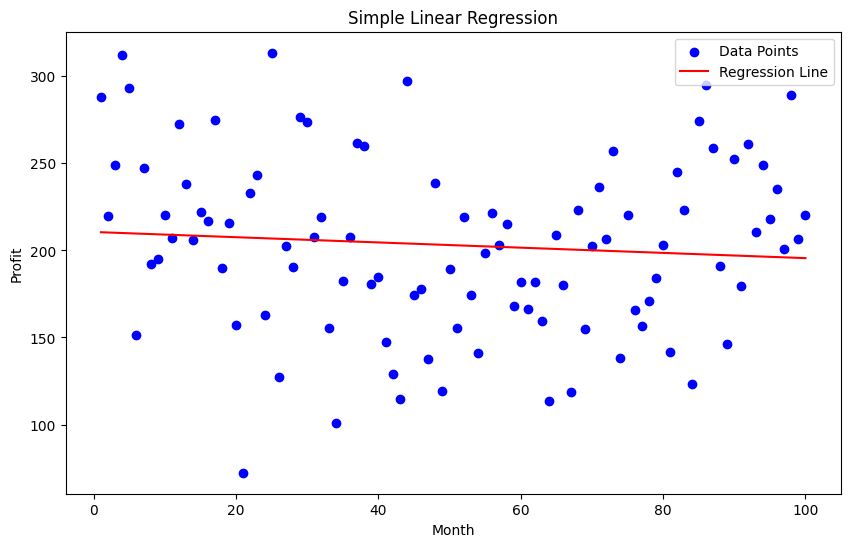

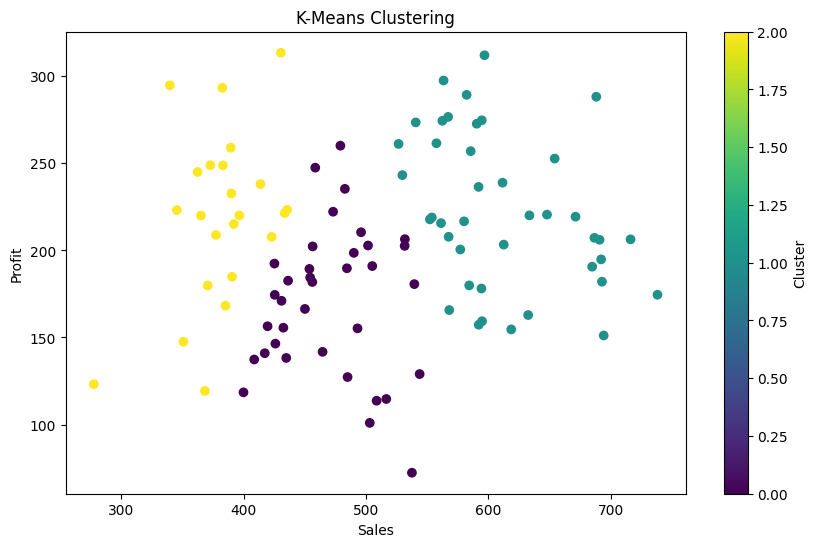

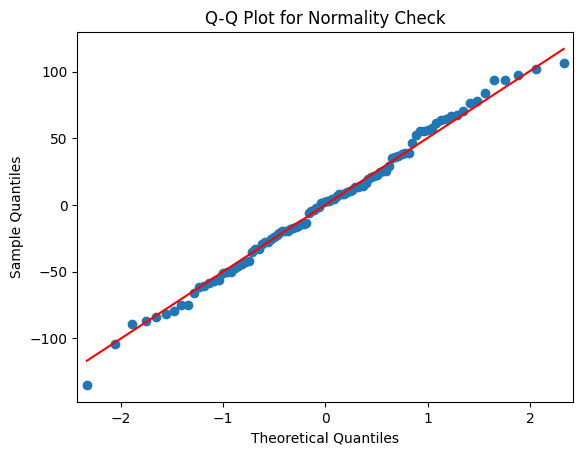


Shapiro-Wilk Test Statistic: 0.9922945448431867, p-value: 0.842133288859106
The residuals are normally distributed (fail to reject H0)

Modeling Summary:
1. Purpose: Linear Regression used for forecasting profits.
2. Variable Requirements: Quantitative variables used for regression and clustering.
3. Data Assumptions: Checked normality of residuals for regression.


In [1]:
# Chooding A Model Review.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans

# Load your dataset
# For demonstration, we'll create a sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Profit': np.random.normal(loc=200, scale=50, size=100),
    'Month': np.arange(1, 101),
    'Sales': np.random.normal(loc=500, scale=100, size=100)
})

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Choose a model based on purpose
# Purpose: Time Series Analysis for forecasting future profits
# Here, we're using linear regression as a simple model for demonstration

# Simple Linear Regression
X = data['Month']
y = data['Profit']

# Add a constant to the independent variable (Month)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression model
print("\nSimple Linear Regression Results:")
print(model.summary())

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['Month'], data['Profit'], label='Data Points', color='blue')
plt.plot(data['Month'], model.predict(X), label='Regression Line', color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Assessing variable requirements for Cluster Analysis
# For clustering, we'll use the 'Sales' and 'Profit' columns
X_cluster = data[['Sales', 'Profit']]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_cluster)

# Plotting Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Profit'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar(label='Cluster')
plt.show()

# Checking assumptions for Simple Linear Regression
# Normality assumption can be checked using a Q-Q plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot for Normality Check')
plt.show()

# Conducting a Shapiro-Wilk test for normality
from scipy.stats import shapiro

stat, p_value = shapiro(model.resid)
print(f"\nShapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

# Conclusion based on the p-value
alpha = 0.05
if p_value > alpha:
    print("The residuals are normally distributed (fail to reject H0)")
else:
    print("The residuals are not normally distributed (reject H0)")

# Final Notes
print("\nModeling Summary:")
print("1. Purpose: Linear Regression used for forecasting profits.")
print("2. Variable Requirements: Quantitative variables used for regression and clustering.")
print("3. Data Assumptions: Checked normality of residuals for regression.")
